# Example showing how to use the compiler

First start by creating an open graph

In [1]:
import networkx as nx

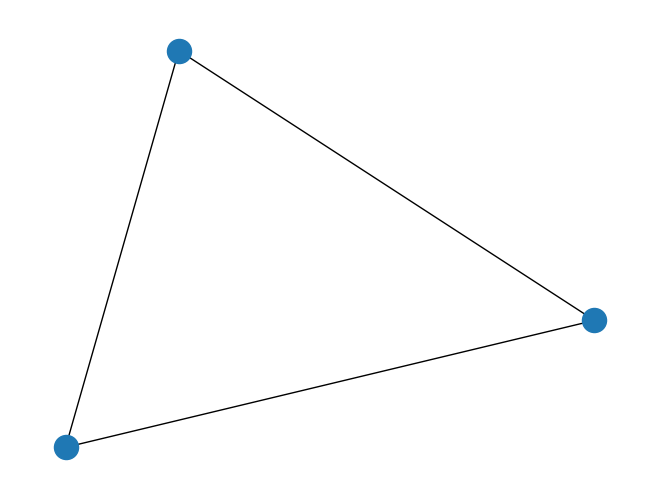

In [2]:
g = nx.Graph([(0, 1), (0, 2), (2, 1)])
nx.draw(g)

Create the open graph on top by assigning measurements for

In [4]:
from optyx.compiler import OpenGraph, Measurement

meas = {i: Measurement(0.5 * i, "XY") for i in range (3)}
inputs = [0]
outputs = [2]

og = OpenGraph(g, meas, inputs, outputs)

Now compile the open graph to instructions that can be executed on a machine with a single resource state emitter and unlimited measurement devices

In [5]:
from optyx.compiler.semm import compile_to_semm
compile_to_semm(og)

[NextNodeOp(node_id=0),
 FusionOp(delay=3, fusion_type='X'),
 MeasureOp(delay=0, measurement=Measurement(angle=0.0, plane='XY')),
 NextNodeOp(node_id=1),
 MeasureOp(delay=0, measurement=Measurement(angle=0.5, plane='XY')),
 NextNodeOp(node_id=2),
 FusionOp(delay=0, fusion_type='X'),
 MeasureOp(delay=0, measurement=Measurement(angle=1.0, plane='XY'))]